# Jupyter Data Science Workflow

## From exploratory analysis to reproducible science

*Notes follow the YouTube videos by Jake VanderPlas*

In [1]:
URL = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'

In [2]:
from urllib.request import urlretrieve
urlretrieve(URL, 'Fremont.csv')

('Fremont.csv', <http.client.HTTPMessage at 0x7f3d002f3690>)

In [3]:
!head Fremont.csv

Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
10/03/2012 12:00:00 AM,13,4,9
10/03/2012 01:00:00 AM,10,4,6
10/03/2012 02:00:00 AM,2,1,1
10/03/2012 03:00:00 AM,5,2,3
10/03/2012 04:00:00 AM,7,6,1
10/03/2012 05:00:00 AM,31,21,10
10/03/2012 06:00:00 AM,155,105,50
10/03/2012 07:00:00 AM,352,257,95
10/03/2012 08:00:00 AM,437,291,146


In [4]:
import pandas as pd
data = pd.read_csv('Fremont.csv')
data.head()

,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
0,10/03/2012 12:00:00 AM,13.0,4.0,9.0
1,10/03/2012 01:00:00 AM,10.0,4.0,6.0
2,10/03/2012 02:00:00 AM,2.0,1.0,1.0
3,10/03/2012 03:00:00 AM,5.0,2.0,3.0
4,10/03/2012 04:00:00 AM,7.0,6.0,1.0


In [5]:
data = pd.read_csv('Fremont.csv', index_col='Date')
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
10/03/2012 12:00:00 AM,13.0,4.0,9.0
10/03/2012 01:00:00 AM,10.0,4.0,6.0
10/03/2012 02:00:00 AM,2.0,1.0,1.0
10/03/2012 03:00:00 AM,5.0,2.0,3.0
10/03/2012 04:00:00 AM,7.0,6.0,1.0


In [6]:
data = pd.read_csv('Fremont.csv', index_col='Date', parse_dates=True)


In [7]:
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


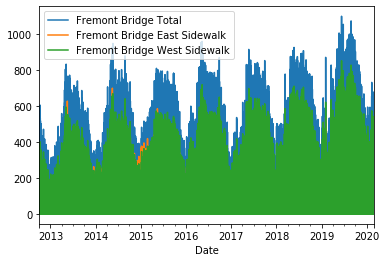

In [8]:
%matplotlib inline
data.plot();

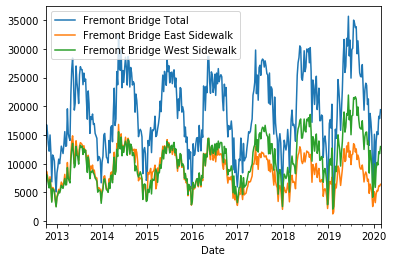

In [9]:
data.resample('W').sum().plot();

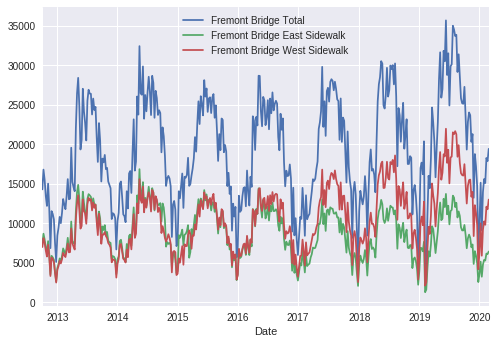

In [10]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
data.resample('W').sum().plot();

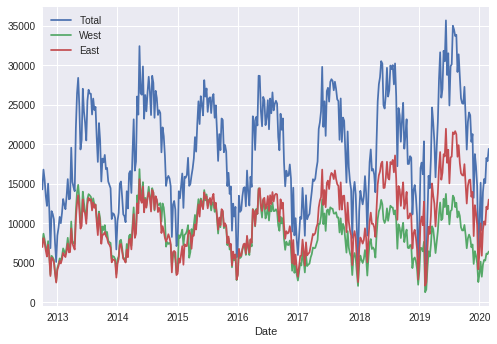

In [11]:
data.columns = ['Total', 'West', 'East']
data.resample('W').sum().plot();

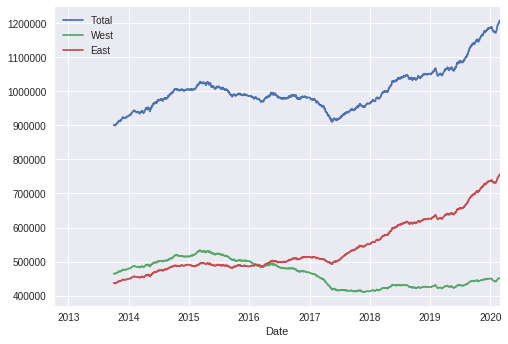

In [12]:
data.resample('D').sum().rolling(365).sum().plot();

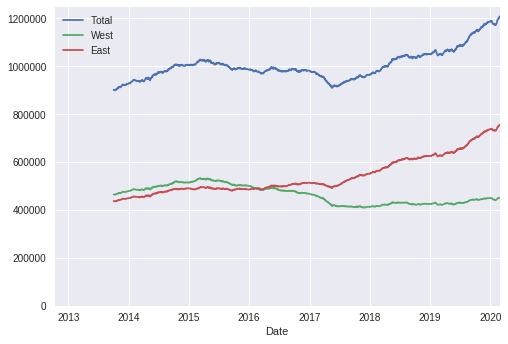

In [13]:
ax = data.resample('D').sum().rolling(365).sum().plot();
ax.set_ylim(0, None);

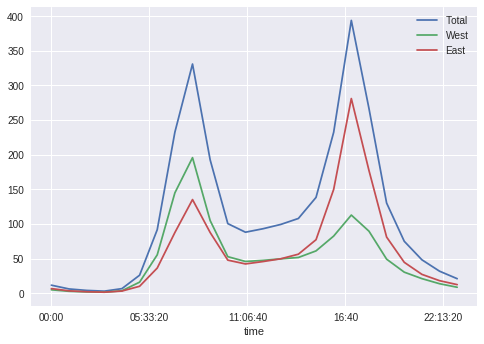

In [14]:
# see trend within day, averaging the data
# peaks indicate when people conmute
data.groupby(data.index.time).mean().plot();

In [15]:
# See whole data set in this way
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.iloc[:5, :5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


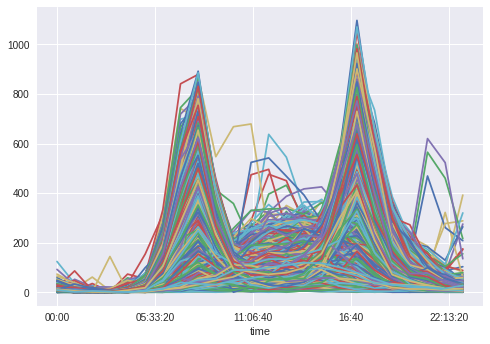

In [16]:
pivoted.plot(legend=False);

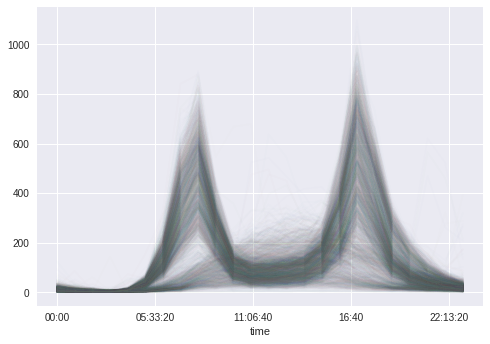

In [17]:
pivoted.plot(legend=False, alpha=0.01);

# GitHub

### Go to github, create a repository, say JupyterWorkflow.

### Then go to "clone/download" and get the string that appears

### In the local computer, type in a terminal (

git clone https://github.com/miguelpereztorres/JupyterWorkflow.git

### This will create directory  JupiterWorkflow. Move now your jupyter book there

mv JupyterWorkflow.ipynb JupyterWorkflow/

cd JupyterWorkflow

### Configure user.email and user.name in git 

git config --global user.email torres@iaa.es
git config --global user.name miguelpereztorres

### Now add your notebook directory to git

git add JupyterWorkflow.ipynb

git commit -m "Add initial analysis notebook" 

git push origin master

### You can go to github, reload the page, and see that indeed the notebook is there
### Now, I can check the status locally

git status

